---
---

# 1. Setup

---
---

### Imports

In [ ]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
from tqdm.auto import tqdm

### Mount the Drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/ca4015_assignment4")

---
---

# 2. Read in Data

---
---

In [ ]:
df = pd.read_csv("data/processed_data/original_and_spotify_data.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.sample(5)

,userID,artistID,artistWeight,friendID,artistName,tagID,timestamp,tagValue,spotifyName,imageUrl,genres,spotifyUrl
1529528,852,2521,1448.0,253.0,Robyn,NaN,NaN,NaN,Robyn,https://i.scdn.co/image/2bc5f72017b642d898bd1d...,"['art pop', 'dance pop', 'electropop', 'europo...",https://open.spotify.com/artist/6UE7nl9mha6s8z...
806433,196,498,2374.0,1210.0,Paramore,508.0,2008-06-30 22:00:00,love,Paramore,https://i.scdn.co/image/abb33b323f50801c28f2a2...,"['candy pop', 'emo', 'pixie', 'pop emo', 'pop ...",https://open.spotify.com/artist/74XFHRwlV6OrjE...
2009064,1161,12808,430.0,1528.0,アヲイ,141.0,2010-05-31 22:00:00.000,visual kei,アヲイ,NaN,[],NaN
2034860,1278,5055,274.0,421.0,Pezet/Małolat,730.0,2010-11-30 23:00:00.000,love at first listen,Pezet/Małolat,NaN,[],NaN
1508807,1986,2343,171.0,2042.0,KISS,NaN,NaN,NaN,KISS,https://i.scdn.co/image/74925968b2f76706c62bed...,"['album rock', 'classic rock', 'glam rock', 'h...",https://open.spotify.com/artist/07XSN3sPlIlB2L...


---
---

# 3. Explore and Analyse Data

---
---

## Artist Tags

Here we plot the number of unique tags for each artist. While the majority of artists have very few, there are a number that have hundreds. These are most likely very popular artists. 

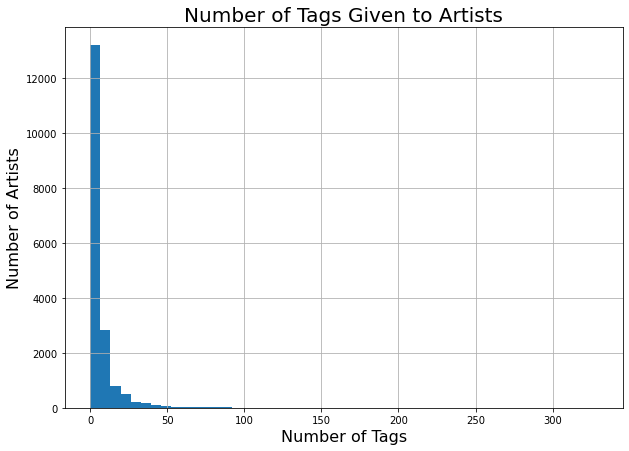

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
df.groupby("artistID")["tagID"].nunique().hist(bins=50, ax=ax)
plt.title("Number of Tags Given to Artists", fontsize=20)
plt.xlabel("Number of Tags", fontsize=16)
plt.ylabel("Number of Artists", fontsize=16)
plt.show()

To be able to label an artist as some genre of music, we assign the most common tag that users have given to them.

In [ ]:
most_common_tag = (
    df
    .groupby("artistID")["tagValue"]
    .value_counts().rename("count").reset_index()
    .groupby("artistID")
    .first()["tagValue"]
)

From these most common tags, we can see that the most common type of artist is in the "alternative" genre.

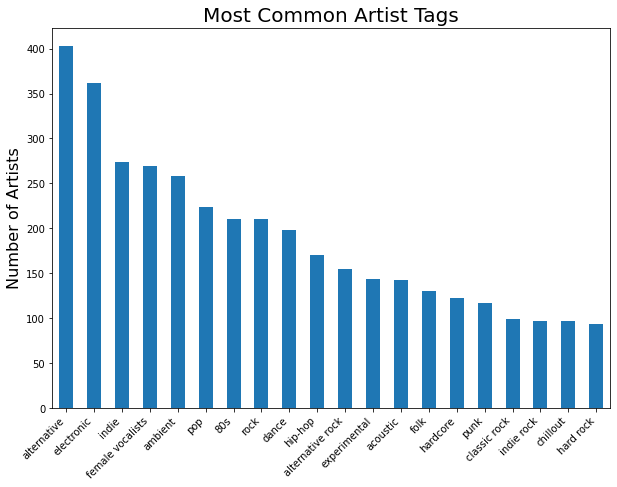

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
most_common_tag.value_counts().head(20).plot.bar(ax=ax)
plt.title("Most Common Artist Tags", fontsize=20)
plt.ylabel("Number of Artists", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.show()

In a similar vein, we can see what kind of tags the users are giving out. Surprisingly, "rock" is the most popular tag for users. This indicates that there are few rock artists, but many rock fans.  

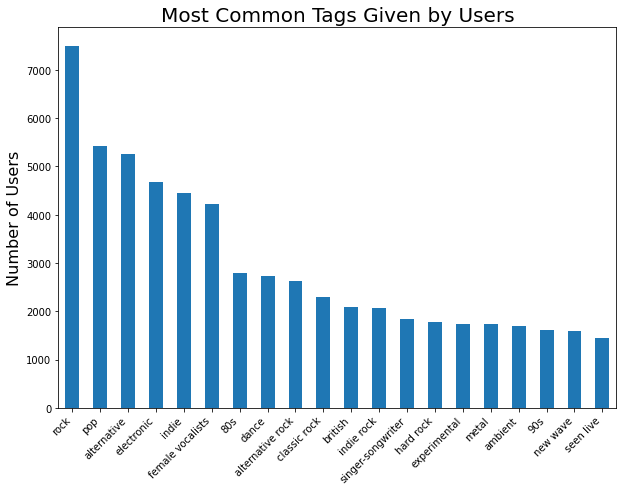

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
df[["artistID", "userID", "tagValue"]].drop_duplicates()["tagValue"].value_counts().head(20).plot.bar(ax=ax)
plt.title("Most Common Tags Given by Users", fontsize=20)
plt.ylabel("Number of Users", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.show()

## Friends

To see how well connected users are, we can plot how many friends they have. The distribution is fairly normal, with the majority of people having less than 10 friends on last.fm.  

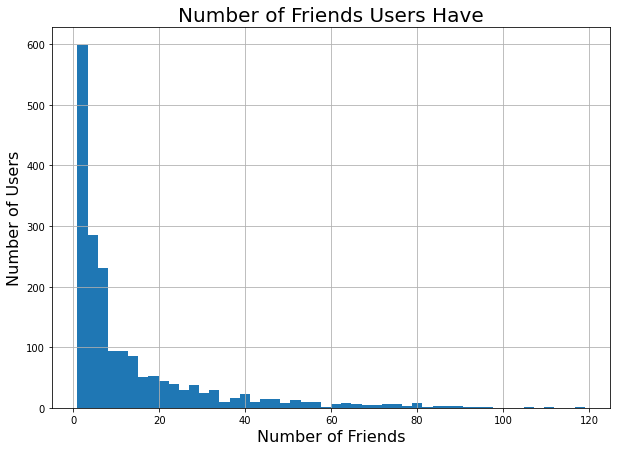

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
df.groupby("userID")["friendID"].nunique().hist(bins=50, ax=ax)
plt.title("Number of Friends Users Have", fontsize=20)
plt.ylabel("Number of Users", fontsize=16)
plt.xlabel("Number of Friends", fontsize=16)
plt.show()

## Listening

To see how popular artists are, we can count how many people listened to their music.

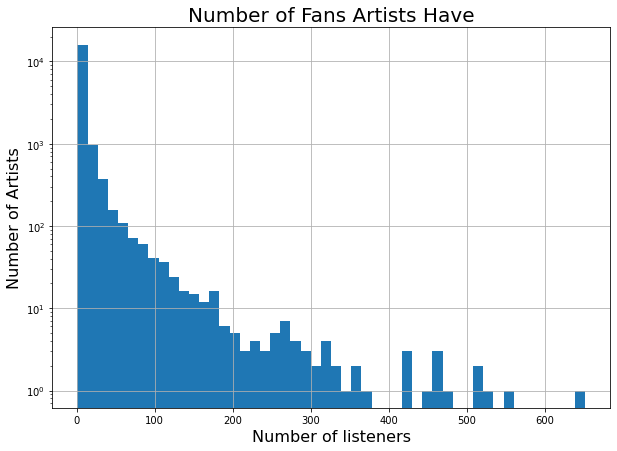

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
df.groupby("artistID")["userID"].nunique().hist(bins=50, ax=ax)
plt.title("Number of Fans Artists Have", fontsize=20)
plt.xlabel("Number of listeners", fontsize=16)
plt.ylabel("Number of Artists", fontsize=16)
plt.yscale("log")
plt.show()

Likewise, we can plot the total amount of time artists are listened to. There are a few artists with a huge amount of listening time, which may be that they are widely popular among users.  

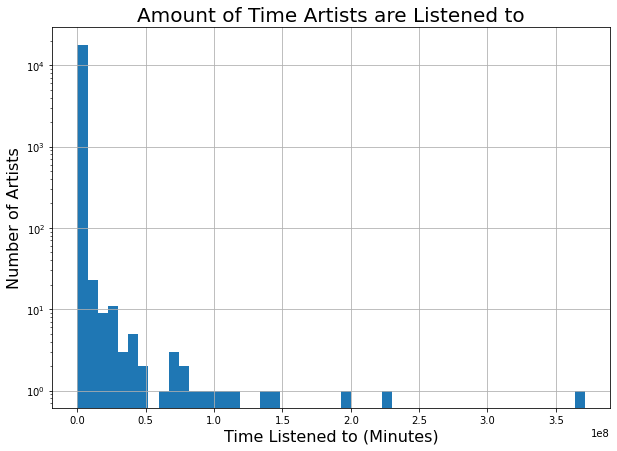

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
df.groupby("artistID")["artistWeight"].sum().hist(bins=50, ax=ax)
plt.title("Amount of Time Artists are Listened to", fontsize=20)
plt.ylabel("Number of Artists", fontsize=16)
plt.xlabel("Time Listened to (Minutes)", fontsize=16)
plt.yscale("log")
plt.show()

Finally, we can take a look at how engaging an artist is, that is how long a user listens to their music. This reveals that a lot of users will only listen to a few hours of an artist's music, however there is one artist with some really diehard fans, with an average of 22 days of listening time per user.  

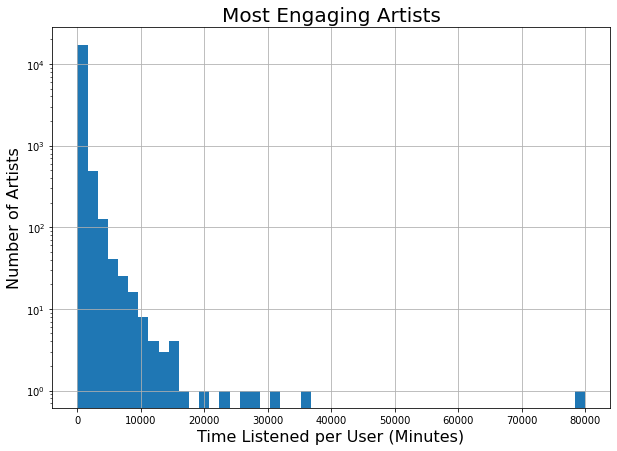

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
(df.groupby("artistID")["artistWeight"].sum() / df.groupby("artistID")["userID"].count()).hist(bins=50, ax=ax)

plt.title("Most Engaging Artists", fontsize=20)
plt.xlabel("Time Listened per User (Minutes)", fontsize=16)
plt.ylabel("Number of Artists", fontsize=16)
plt.yscale("log")
plt.show()